In [1]:
from tropy.learn import fit_hyperplane, fit_classifier
from tropy.metrics import accuracy_precision_recall_confusion
from tropy.graph import plot_confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(
    filename: str, slice: int
) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    df = pd.read_csv(filename)
    cols_filter = lambda label, var: [
        col for col in df.columns if label in col and var in col
    ][10 * slice : 10 * (slice + 1)]

    return (
        np.array([df[col] for col in cols_filter("Training", "from.P")]),
        np.array([df[col] for col in cols_filter("Training", "from.Q")]),
        np.array([df[col] for col in cols_filter("Test", "from.P")]),
        np.array([df[col] for col in cols_filter("Test", "from.Q")]),
    )

In [3]:
def compute_accuracy(
    Cplus_train: np.ndarray,
    Cminus_train: np.ndarray,
    Cplus_test: np.ndarray,
    Cminus_test: np.ndarray,
    verbose_print: bool = False,
    N: int = 200,
) -> float:
    Cplus_trans, Cminus_trans, x, l = fit_hyperplane(Cplus_train, Cminus_train, N=N)
    predictor, _ = fit_classifier([Cminus_trans, Cplus_trans], x)
    accuracy, precision, recall, conf_matrix = accuracy_precision_recall_confusion(
        predictor, Cplus_test, Cminus_test
    )

    if verbose_print:
        print(f"Apex: {x}\nMargin: {np.abs(l)}\nAccuracy: {round(accuracy, 3)}\nPrecision: {round(precision, 3)}\nRecall: {round(recall, 3)}")
        plot_confusion_matrix(conf_matrix)

    return accuracy

## Detailed training over one dataset

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:00<00:00, 13810.23it/s]

Apex: [-0.175 -0.175 -0.175 -0.175 -1.425 -0.425  1.825  0.575  0.075  0.075]
Margin: 0.0
Accuracy: 0.84
Precision: 0.96
Recall: 0.774


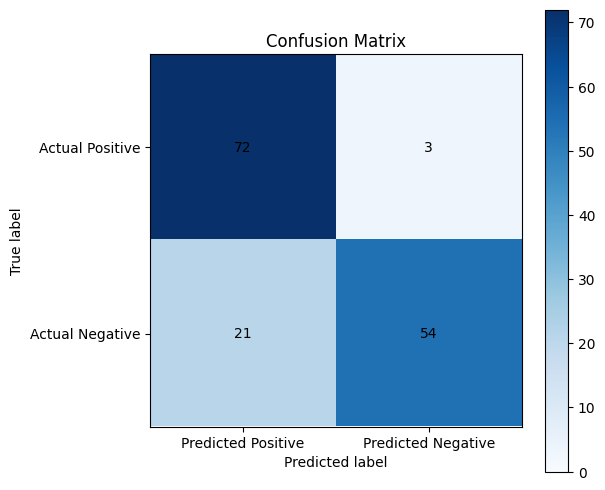

0.84

In [4]:
compute_accuracy(*load_data("data/10.csv", 1), verbose_print=True)

## Accuracy over all datasets

In [5]:
accuracies = []
for i in range(1, 13):
    accuracies.append(max([compute_accuracy(*load_data(f"data/{i}.csv", s)) for s in range(10)]))

100%|██████████| 200/200 [00:00<00:00, 8848.74it/s]


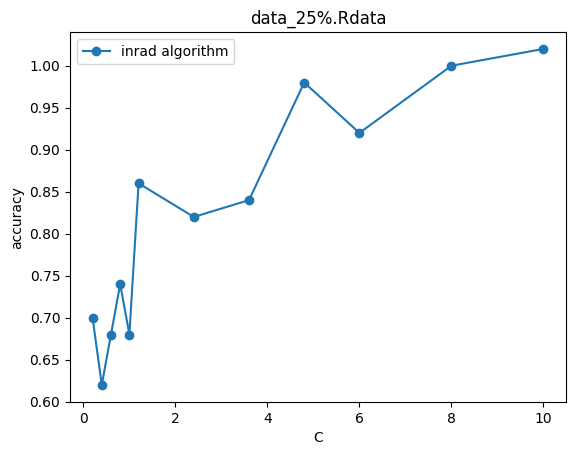

In [6]:
C = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 2.4, 3.6, 4.8, 6, 8, 10]
plt.title("data_25%.Rdata")
plt.plot(C, accuracies, marker="o", label="inrad algorithm")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()